# Causal diffusion with $u^\mu = (1,0,0,0)$

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [2]:
weight_0_temp = np.loadtxt("weight[0]_1.dat")
weight_1_temp = np.loadtxt("weight[1]_1.dat")
weight_2_temp = np.loadtxt("weight[2]_1.dat")
weight_3_temp = np.loadtxt("weight[3]_1.dat")
weight_4_temp = np.loadtxt("weight[4]_1.dat")

h = 0.1
rho = 20.

In [3]:
t_list = np.unique(weight_0_temp[:,0])
nt = len(t_list)
nx = int(len(weight_0_temp[:,0])/nt)

weight_0 = weight_0_temp[:,1].reshape(nt, nx)
weight_1 = weight_1_temp[:,1].reshape(nt, nx)
weight_2 = weight_2_temp[:,1].reshape(nt, nx)
weight_3 = weight_3_temp[:,1].reshape(nt, nx)
weight_4 = weight_4_temp[:,1].reshape(nt, nx)

x_pts = np.linspace(-2., 2., nx)
zero_pts = np.zeros(nx)

<IPython.core.display.Javascript object>


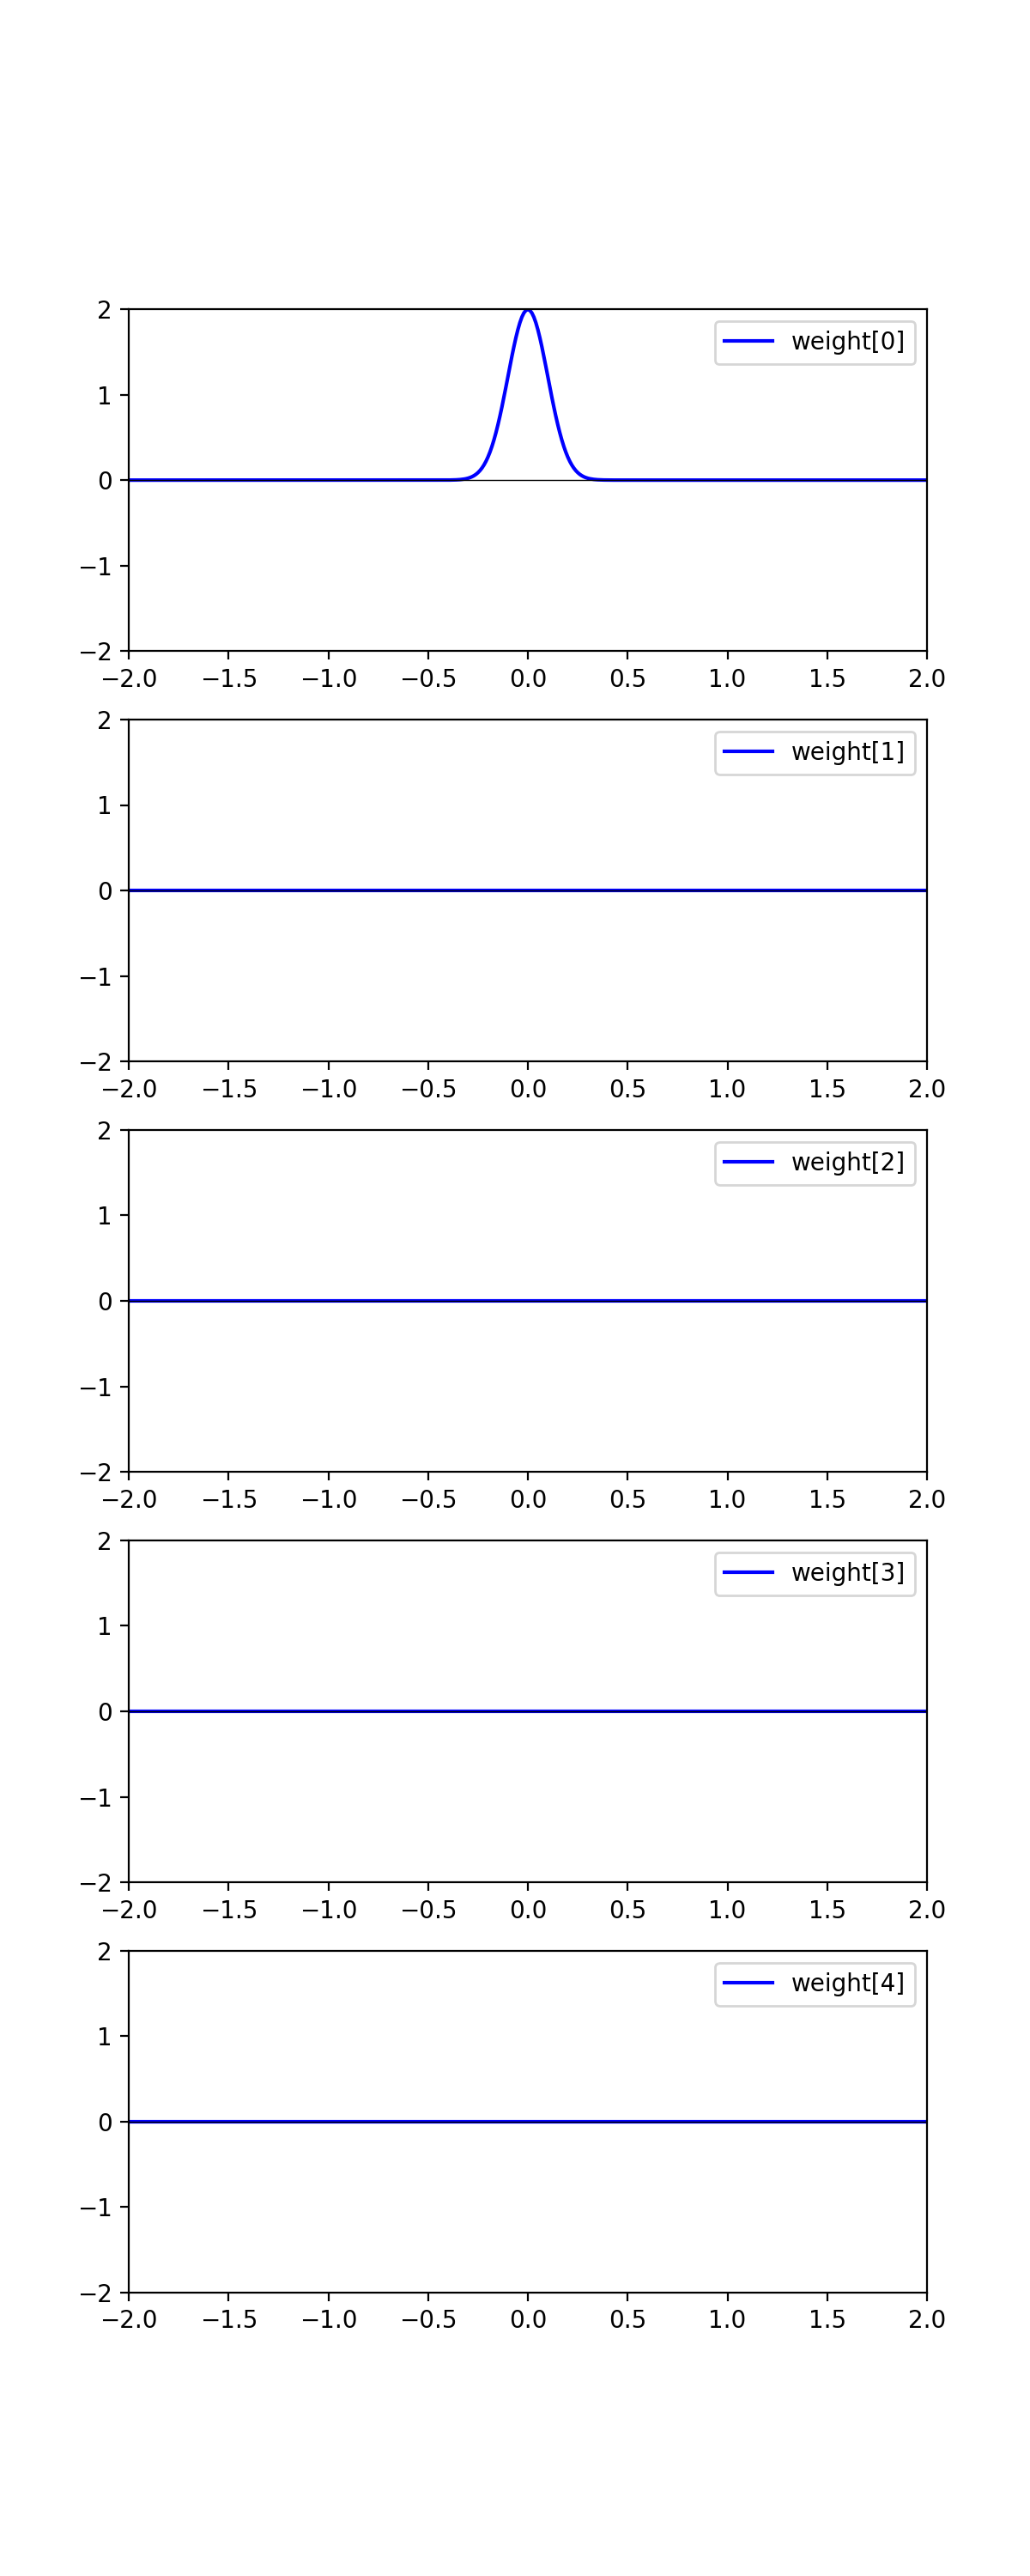

In [4]:
fig1 = plt.figure(figsize=(6, 15))
ax0 = fig1.add_subplot(5,1,1)
ax0.plot(x_pts, weight_0[0,:], color='blue', label="weight[0]")
ax0.plot(x_pts, zero_pts, color='black', lw = 0.5)
ax0.set_xlim(-2.,2.)
ax0.set_ylim(-2.,2.)
ax0.legend()

ax1 = fig1.add_subplot(5,1,2)
ax1.plot(x_pts, weight_1[0,:], color='blue', label="weight[1]")
ax1.plot(x_pts, zero_pts, color='black', lw = 0.5)
ax1.set_xlim(-2.,2.)
ax1.set_ylim(-2.,2.)
ax1.legend()

ax2 = fig1.add_subplot(5,1,3)
ax2.plot(x_pts, weight_2[0,:], color='blue', label="weight[2]")
ax2.plot(x_pts, zero_pts, color='black', lw = 0.5)
ax2.set_xlim(-2.,2.)
ax2.set_ylim(-2.,2.)
ax2.legend()

ax3 = fig1.add_subplot(5,1,4)
ax3.plot(x_pts, weight_3[0,:], color='blue', label="weight[3]")
ax3.plot(x_pts, zero_pts, color='black', lw = 0.5)
ax3.set_xlim(-2.,2.)
ax3.set_ylim(-2.,2.)
ax3.legend()

ax4 = fig1.add_subplot(5,1,5)
ax4.plot(x_pts, weight_4[0,:], color='blue', label="weight[4]")
ax4.plot(x_pts, zero_pts, color='black', lw = 0.5)
ax4.set_xlim(-2.,2.)
ax4.set_ylim(-2.,2.)
ax4.legend()

fig1.savefig('weight_init_1.png', bbox_inches='tight', dpi = 200.)

<IPython.core.display.Javascript object>


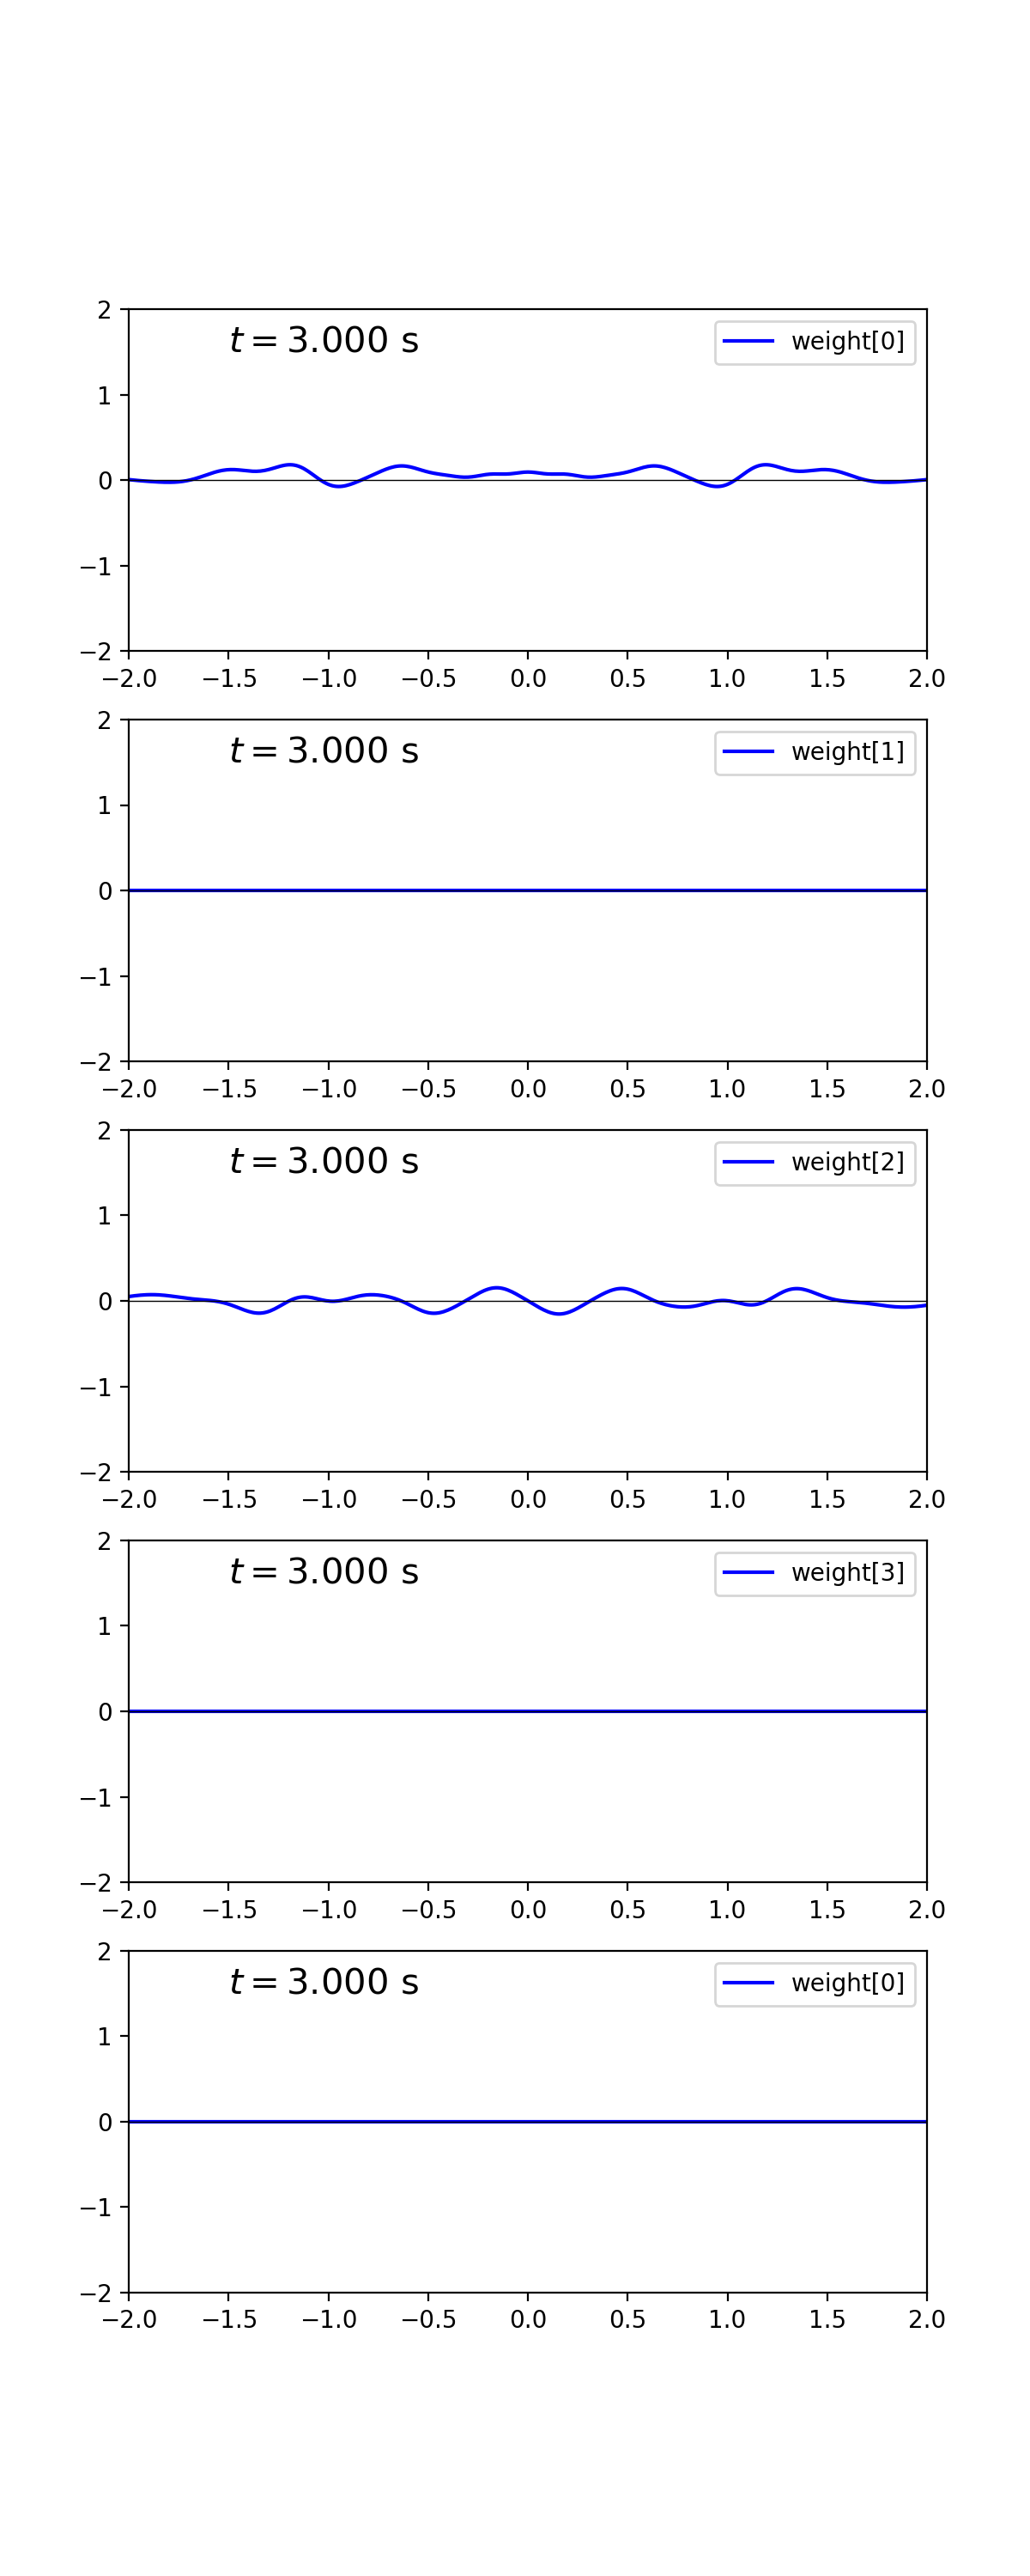

In [5]:
fig_anim = plt.figure(figsize=(6, 15))
ax_anim0 = fig_anim.add_subplot(5,1,1)
plot0, = ax_anim0.plot(x_pts, weight_0[0,:], color='blue', label="weight[0]")
ax_anim0.plot(x_pts, zero_pts, color='black', lw = 0.5)
time_text0 = ax_anim0.text(-1.5, 1.5, r"$t = {0:4.3f}$ s".format(t_list[0]),
                      color="black", fontsize=15)
ax_anim0.set_xlim(-2.,2.)
ax_anim0.set_ylim(-2.,2.)
ax_anim0.legend()

ax_anim1 = fig_anim.add_subplot(5,1,2)
plot1, = ax_anim1.plot(x_pts, weight_1[0,:], color='blue', label="weight[1]")
ax_anim1.plot(x_pts, zero_pts, color='black', lw = 0.5)
time_text1 = ax_anim1.text(-1.5, 1.5, r"$t = {0:4.3f}$ s".format(t_list[0]),
                      color="black", fontsize=15)
ax_anim1.set_xlim(-2.,2.)
ax_anim1.set_ylim(-2.,2.)
ax_anim1.legend()

ax_anim2 = fig_anim.add_subplot(5,1,3)
plot2, = ax_anim2.plot(x_pts, weight_2[0,:], color='blue', label="weight[2]")
ax_anim2.plot(x_pts, zero_pts, color='black', lw = 0.5)
time_text2 = ax_anim2.text(-1.5, 1.5, r"$t = {0:4.3f}$ s".format(t_list[0]),
                      color="black", fontsize=15)
ax_anim2.set_xlim(-2.,2.)
ax_anim2.set_ylim(-2.,2.)
ax_anim2.legend()

ax_anim3 = fig_anim.add_subplot(5,1,4)
plot3, = ax_anim3.plot(x_pts, weight_3[0,:], color='blue', label="weight[3]")
ax_anim3.plot(x_pts, zero_pts, color='black', lw = 0.5)
time_text3 = ax_anim3.text(-1.5, 1.5, r"$t = {0:4.3f}$ s".format(t_list[0]),
                      color="black", fontsize=15)
ax_anim3.set_xlim(-2.,2.)
ax_anim3.set_ylim(-2.,2.)
ax_anim3.legend()

ax_anim4 = fig_anim.add_subplot(5,1,5)
plot4, = ax_anim4.plot(x_pts, weight_4[0,:], color='blue', label="weight[0]")
ax_anim4.plot(x_pts, zero_pts, color='black', lw = 0.5)
time_text4 = ax_anim4.text(-1.5, 1.5, r"$t = {0:4.3f}$ s".format(t_list[0]),
                      color="black", fontsize=15)
ax_anim4.set_xlim(-2.,2.)
ax_anim4.set_ylim(-2.,2.)
ax_anim4.legend()

def animate(i):
    global plot1, plot2
    plot0.set_data(x_pts, weight_0[i,:])
    plot1.set_data(x_pts, weight_1[i,:])
    plot2.set_data(x_pts, weight_2[i,:])
    plot3.set_data(x_pts, weight_3[i,:])
    plot4.set_data(x_pts, weight_4[i,:])
    
    time_text0.set_text(r"$t = {0:4.3f}$ s".format(t_list[i]))
    time_text1.set_text(r"$t = {0:4.3f}$ s".format(t_list[i]))
    time_text2.set_text(r"$t = {0:4.3f}$ s".format(t_list[i]))
    time_text3.set_text(r"$t = {0:4.3f}$ s".format(t_list[i]))
    time_text4.set_text(r"$t = {0:4.3f}$ s".format(t_list[i]))
    
    return (plot0,), (plot1,), (plot2,), (plot3,), (plot4,), \
        time_text0, time_text1, time_text2, time_text3, time_text4

anim = animation.FuncAnimation(fig_anim, animate, frames=nt, repeat=False)
anim.save('anim_1.mp4', fps=10)